Back to the main [Index](../index.ipynb)

## FATBANDS.nc file

The `FATBANDS.nc` contains the projection of the KS wavefunctions onto atom-centered
functions with given angular momentum $L$. 
The file is generated by using the `prtdos` variable either in a SCF or NSCF run.
One can use the `abiopen` function provided by `abilab` to open the file and generate an instance of `FatbandsFile`.
Alternatively, one can use the `abiopen.py` script to open the file inside the shell with the syntax:

    abiopen.py out_FATBANDS.nc 
    
This command will start the ipython interpreter so that one can interact directly with the `FatbandFile` object (named `abifile` inside ipython).
To generate a jupyter notebook use:

    abiopen.py out_FATBANDS.nc -nb

In [14]:
from __future__ import print_function
%matplotlib notebook

import seaborn  # Activate seaborn settings (optional)

from abipy import abilab
import abipy.data as abidata

In [2]:
# This fatbands file has been produced on a k-path so it's not suitable for DOS calculations.
fbnc_kpath = abilab.abiopen(abidata.ref_file("mgb2_kpath_FATBANDS.nc"))

# Print file info (dimensions, variables ...)
# Note that prtdos = 3, so LM decomposition is not available.
print(fbnc_kpath)

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:63: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Fri Oct 13 01:05:35 2017
Modification Time: Fri Jul 14 14:34:02 2017
Change Time: Fri Jul 14 14:34:02 2017

============================== Electronic Bands ==============================
Structure Summary
Lattice
    abc : 3.0860000121299263 3.0860000121299263 3.5230000138476112
 angles : 90.0 90.0 120.00000000000001
 volume : 29.055952940596399
      A : 2.6725544065836022 1.5430000060649625 0.0
      B : -2.6725544065836022 1.5430000060649625 0.0
      C : 0.0 0.0 3.5230000138476112
PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: B (-0.8909, 1.5430, 1.7615) [0.3333, 0.6667, 0.5000]
PeriodicSite: B (0.8909, 1.5430, 1.7615) [0.6667, 0.3333, 0.5000]

Number of electrons: 8.0, Fermi level: 6.851 [eV]
nsppol: 1, nkpt: 78, mband: 8, nspinor: 1, nspden: 

To plot the k-points belonging to the path:

<IPython.core.display.Javascript object>


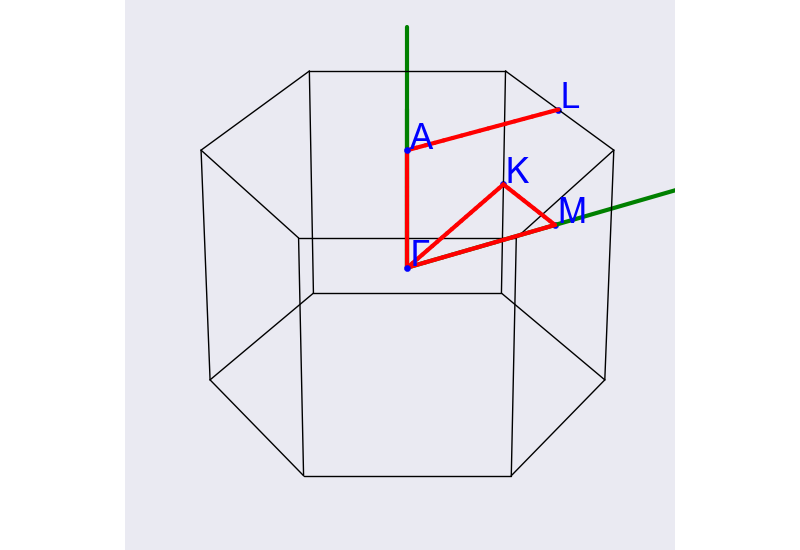

In [3]:
fbnc_kpath.ebands.kpoints.plot();

To plot the electronic fatbands grouped by atomic type:

<IPython.core.display.Javascript object>


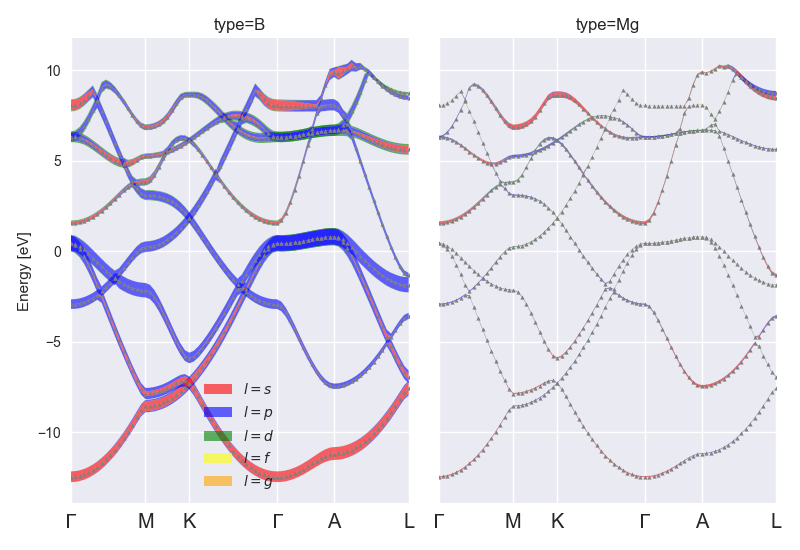

In [5]:
fbnc_kpath.plot_fatbands_typeview(tight_layout=True);

To plot the electronic fatbands grouped by L:

<IPython.core.display.Javascript object>


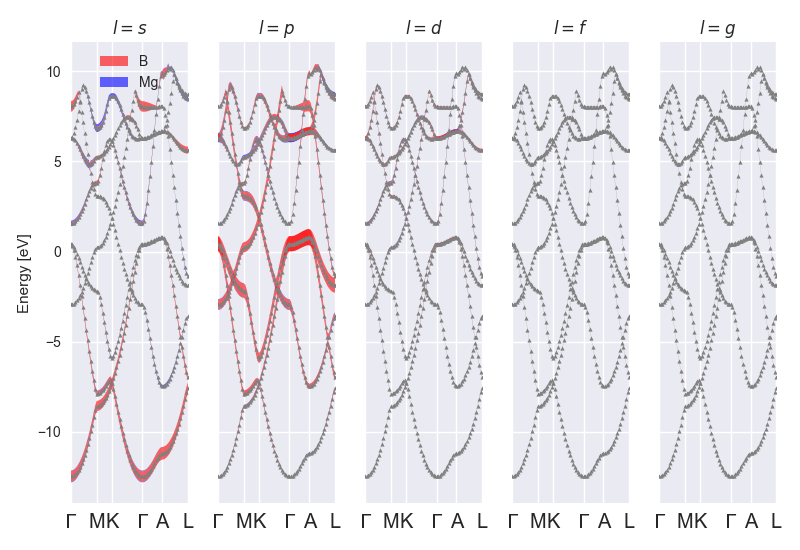

In [7]:
fbnc_kpath.plot_fatbands_lview(tight_layout=True);

Now we read another FATBANDS file produced on 18x18x18 k-mesh

In [15]:
fbnc_kmesh = abilab.abiopen(abidata.ref_file("mgb2_kmesh181818_FATBANDS.nc"))
print(fbnc_kpath)

================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Fri Oct 13 01:06:38 2017
Modification Time: Fri Jul 14 14:34:02 2017
Change Time: Fri Jul 14 14:34:02 2017

============================== Electronic Bands ==============================
Structure Summary
Lattice
    abc : 3.0860000121299263 3.0860000121299263 3.5230000138476112
 angles : 90.0 90.0 120.00000000000001
 volume : 29.055952940596399
      A : 2.6725544065836022 1.5430000060649625 0.0
      B : -2.6725544065836022 1.5430000060649625 0.0
      C : 0.0 0.0 3.5230000138476112
PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: B (-0.8909, 1.5430, 1.7615) [0.3333, 0.6667, 0.5000]
PeriodicSite: B (0.8909, 1.5430, 1.7615) [0.6667, 0.3333, 0.5000]

Number of electrons: 8.0, Fermi level: 6.851 [eV]
nsppol: 1, nkpt: 78, mband: 8, nspinor: 1, nspden: 

Plot the L-PJDOS grouped by atomic type:

<IPython.core.display.Javascript object>


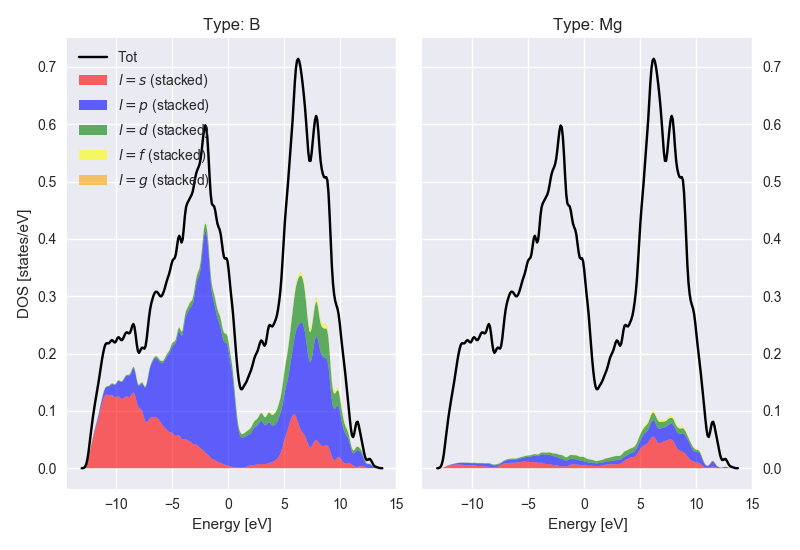

In [9]:
fbnc_kmesh.plot_pjdos_typeview(tight_layout=True);

Plot the L-PJDOS grouped by L:

<IPython.core.display.Javascript object>


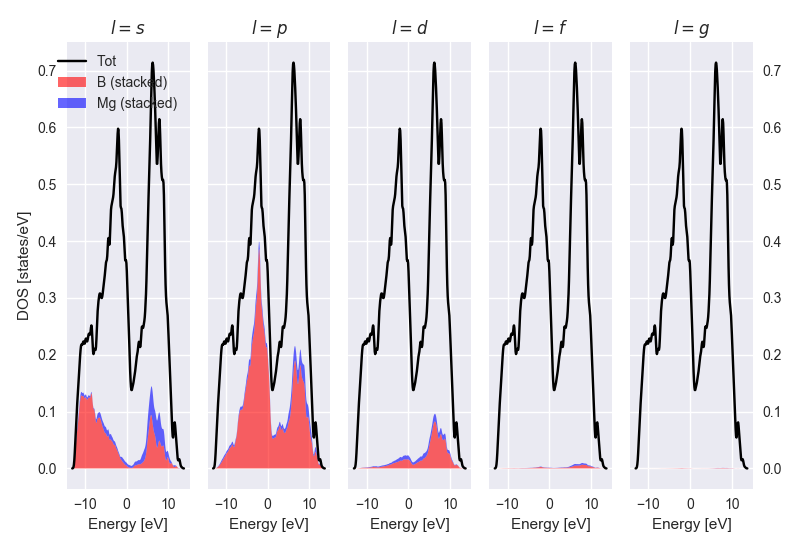

In [10]:
fbnc_kmesh.plot_pjdos_lview(tight_layout=True);

Now we use the two netcdf files to produce plots with fatbands + PJDOSEs.
The data for the DOS is taken from pjdosfile.

<IPython.core.display.Javascript object>


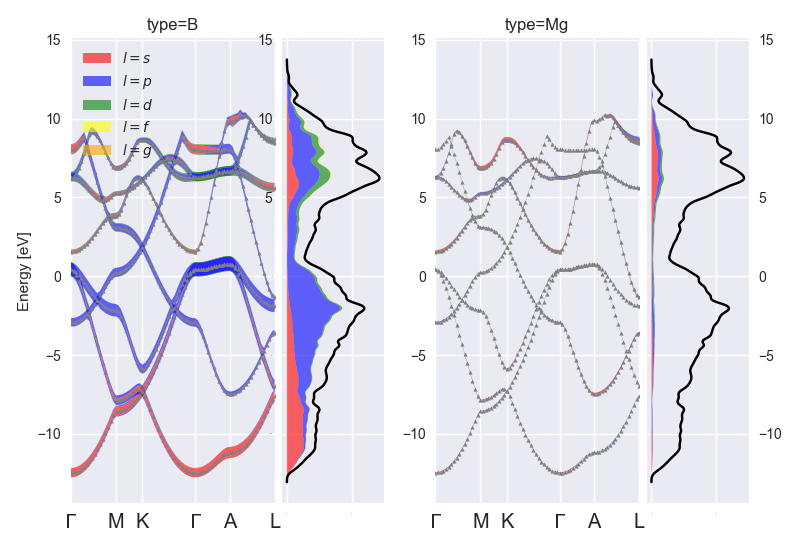

In [17]:
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="type", tight_layout=True);

fatbands + PJDOS grouped by L:

<IPython.core.display.Javascript object>


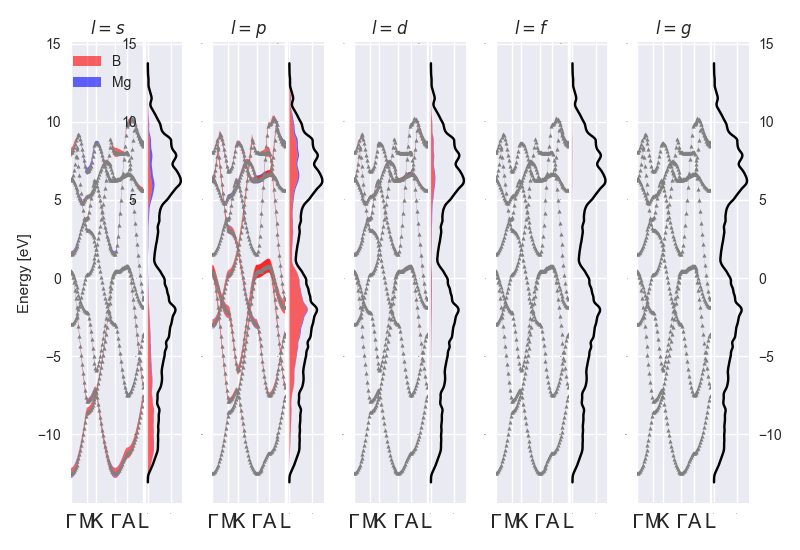

In [12]:
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="lview", tight_layout=True);

Remember to close the files:

In [13]:
fbnc_kpath.close()
fbnc_kmesh.close()